# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [57]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

## Regression Model Evaluation

In [5]:
from sklearn.datasets import load_boston
import pandas as pd

data = load_boston()
X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])
data = pd.concat([X, y], axis=1)

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [6]:
y = data['MEDV']

In [7]:
data.drop('MEDV', axis=1, inplace=True)

In [8]:
X = data.copy()

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [10]:
# Instantiate the model
linearRegressor = LinearRegression()

# Fit the model
linearRegressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
# Calculate the predictions for the test set
yPrediction_test = linearRegressor.predict(X_test)
yPrediction_train = linearRegressor.predict(X_train)

¿ Por qué se tiene que predicr de X_train ?

## 3. Calculate and print R-squared for both the training and the testing set.

In [12]:
# There seems to be two ways to do this: Check this later

In [13]:
# R1 for test set
r2_score(y_test, yPrediction_test)

0.668759493535633

In [14]:
# R2 for training test
r2_score(y_train, yPrediction_train)

0.7508856358979672

In [15]:
# I suppose the R2 is always going to be better for the training set, beause it was
# Actually fit on this set

## 4. Calculate and print mean squared error for both the training and the testing set.

In [16]:
mse(y_test, yPrediction_test)

24.291119474973442

In [17]:
mse(y_train, yPrediction_train)

21.641412753226316

In [18]:
# And the rmse, RMSE is the noise in the system
# We see that there is more noise in the test set, what we would expect

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [19]:
mae(y_test, yPrediction_test)

3.1890919658878323

In [20]:
mae(y_train, yPrediction_train)

3.3147716267832266

In [21]:
# In this case the mean absolute error is smaller for the prediction set
# This is not exactlyh what we woudl expect, this metric is considered better when
# it is closer to zero, see video at 3:10
# # https://www.youtube.com/watch?v=K490SP-_H0U

## Classification Model Evaluation

In [159]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

In [163]:
data_sample = data.iloc[:75,:-1]

In [164]:
data_sample

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
70,5.9,3.2,4.8,1.8
71,6.1,2.8,4.0,1.3
72,6.3,2.5,4.9,1.5
73,6.1,2.8,4.7,1.2


## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [23]:
#y = data['class']

In [24]:
#data.drop('class', axis=1, inplace=True)

In [25]:
#X = data.copy()

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [166]:
myRegression = LogisticRegression()

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [167]:
myRegression.fit(X_train, y_train)

/Users/maxcarey/Library/Python/3.7/lib/python/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/maxcarey/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [168]:
y_pred_train = myRegression.predict(X_train)

In [169]:
y_pred_test = myRegression.predict(data_sample)

In [170]:
accuracy_score(y_train, y_pred_train)

0.9523809523809523

In [171]:
accuracy_score(y_test, y_pred_test)

ValueError: Found input variables with inconsistent numbers of samples: [45, 75]

In [71]:
# I am confused about this accuracey score?
# Should it not be the other way around?

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [72]:
balanced_accuracy_score(y_train, y_pred_train)

0.975609756097561

In [73]:
balanced_accuracy_score(y_test, y_pred_test)

1.0

## 10. Calculate and print the precision score for both the training and the testing set.

In [74]:
precision_score(y_train, y_pred_train, average='micro')

0.975

In [75]:
precision_score(y_test, y_pred_test, average='micro')

1.0

## 11. Calculate and print the recall score for both the training and the testing set.

In [76]:
recall_score(y_train, y_pred_train, average='micro')

0.975

In [77]:
recall_score(y_test, y_pred_test, average='micro')

1.0

## 12. Calculate and print the F1 score for both the training and the testing set.

In [78]:
f1_score(y_train, y_pred_train, average='micro')

0.975

In [79]:
f1_score(y_test, y_pred_test, average='micro')

1.0

## 13. Generate confusion matrices for both the training and the testing set.

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


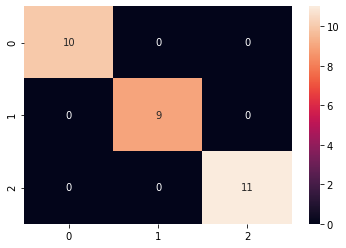

In [80]:
conf_m=confusion_matrix(y_test, y_pred_test)

print (conf_m)
sns.heatmap(conf_m, annot=True);

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.